# Red Wine Data Set

## Data Set


The dataset taken here is ‘Red wine Quality’ by UCI Machine Learning in Kaggle. Originally there are two datasets in the benchmark dataset repository, but the ‘red wine’ data is only taken. 

This data is related to wine data of Portuguese "Vinho Verdo". The classification and regression tasks can be done this data.

Dataset Details: There are 1599 instances in the dataset and with 12 columns. The final column is the ‘Quality’ which is used as target variable. The model predicts the quality based on the other features. 



# Importing the necessary libraries


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Creating a folder


In [3]:
#Before proceeding into the main process, creating a folder to save results.

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory.' + directory)
    
folder = "./Results/"
createFolder(folder)


Original Dataset source: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Import the dataset

In [5]:
#Import the data set
df = pd.read_csv('winequality-red.csv')

# Data Exploration

In [10]:
#check the data head
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From the info we can infer that there is no categorical data in the dataset


In [13]:
#Check for missing values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We see that there are no missing values. Upon checking the raw dataset, we confirmed that there are no categorical values and no missing values. 

## Data Visualization

The correlation between all the features and the behaviour of each feature with other features are plotted below.

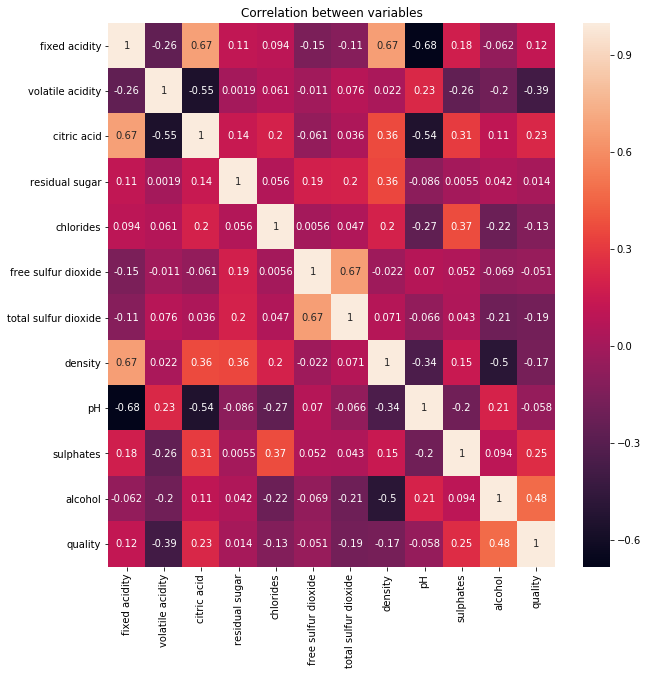

In [14]:
corr = df.corr()
fig, ax = plt.subplots(1, figsize = (10, 10))
wine = sns.heatmap(corr, ax = ax, annot = True)
ax.set_title('Correlation between variables')
figure1 = wine.get_figure()  
sav1 = folder +   "Variables correlation"
figure1.savefig(sav1, dpi = 400)

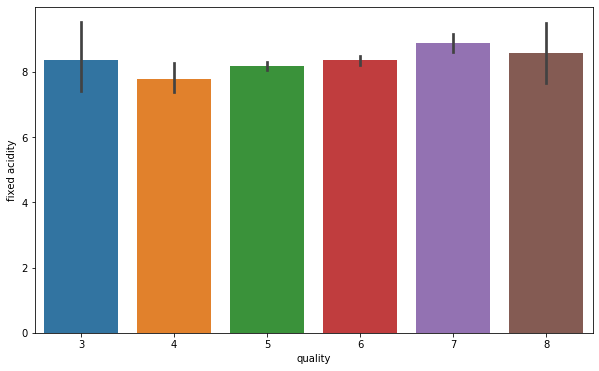

In [15]:
plt.figure(2, figsize = (10, 6))
plot2 = sns.barplot(x = 'quality', y = 'fixed acidity', data = df)
figure2 = plot2.get_figure()
sav2 = folder + " fixed Acidity vs Quality"
figure2.savefig(sav2 , dpi = 400)

As the quality is increasing the volatile acidity is decreasing its trend.


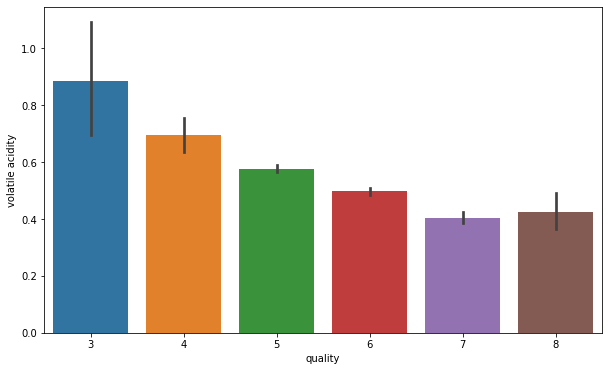

In [16]:
plt.figure(3, figsize = (10,6))
plot3 = sns.barplot(x = 'quality', y = 'volatile acidity', data = df)
figure3 = plot3.get_figure()
sav3 = folder + " Volatile Acidity vs Quality"
figure3.savefig(sav3 , dpi = 400)

Citric acid shows increasing trend with the increase in quality.


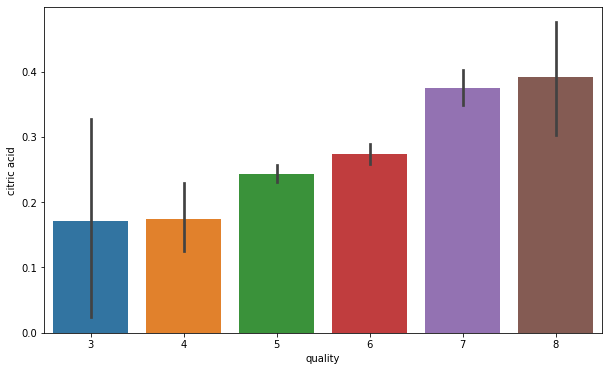

In [18]:
plt.figure(4, figsize = (10,6))
plot4 = sns.barplot(x = 'quality', y = 'citric acid', data = df)
figure4 = plot4.get_figure()
sav4 = folder + " Critic Acid vs Quality"
figure4.savefig(sav4 , dpi = 400)

## Data Preprocessing

The Quality column is ranging with a value to another value. So making Quality column eligible for binary classification by setting limits to the quality by giving limits we speicify the wine as good or bad.

In [19]:
quality = df['quality'].values
category = []
for num in quality:
    if num <5:
        category.append(0)
    elif num >= 5:
        category.append(1)
        
category = pd.DataFrame(data = category, columns = ['Category'])
data = pd.concat([df, category], axis = 1)
data.drop(columns = "quality", axis= 1, inplace = True)
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Category  
0      9.4         1  
1      9.8         1  
2      9.8       

1    1536
0      63
Name: Category, dtype: int64

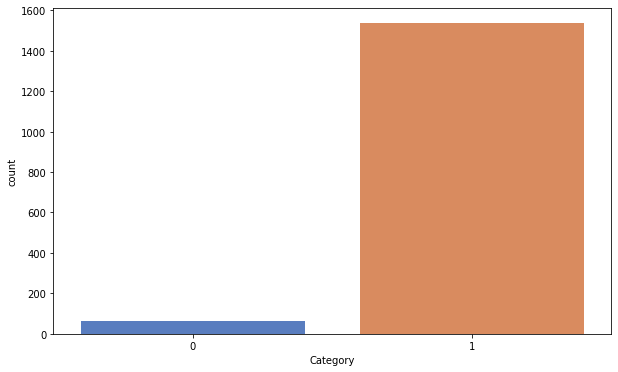

In [20]:
#exploring data further more
plt.figure(5, figsize=(10, 6))
plot5 = sns.countplot(data["Category"], palette = "muted")
figure5 = plot5.get_figure()
sav5 = folder + " Count plot"
figure5.savefig(sav5, dpi = 400)
data["Category"].value_counts()

By making the quality column having values 0 and 1, the problem can be made as binary classification. The limits are specified to differentiate quality as Good or Bad. Good is represented as 1, and bad as 0. 
After this, the quality column is dropped from the dataset. The value count plot for the quality is plotted to visualize the values of quality.

From the plot it is visible that there are more units of good than bad.



Encoding the data makes python easier to compute the differences. Here the features and targets are encoded and split into training and testing data with 30% as testing data. This  data is again standardized to scale all the features into same dimension. This avoid the variance for features which large values. 

In [22]:
#encoding the data
X = data.iloc[:, :-1].values
y1 = data.iloc[:, -1].values
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y1)

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 42)

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

After splitting and scaling, the data is sent into classifier model, to predict the labels. 

## Classification

Classification is a type of machine learning technique which is grouped under Supervised Learning. In classification the data elements are classified based on certain target variable depending on the type of data. It predicts the class for the input variable. 
Basically, there are two types of classification. 
1.	Binomial
2.	Multi-class
Binomial classification has only two variables to predict whereas multi-class have multiple classes which are to be predicted

The model which we are using in for this dataset is Decision Tree Classifier.

Decision Tree Classifier:
Decision tree algorithm is a tree or flow chart type model which has multiple nodes, branches and leaves. The root node is split into two branches. The node attached to each branch again forms node and splits into other two branches. Each branch represents decision rule. The final leaves the final decisions made by the tree. 


Decision Tree Classifier:

The decision tree classifier is imported from the sklearn.tree library. The steps below  explain the classification.
1.	Import the classifier from sklearn.tree as DecisionTreeClassifier
2.	Instantiate the classifier to some variable
3.	Fit the training data to the classifier
4.	Predict the labels by passing testing data into the classifier. 
5.	The labels are obtained, and these labels must be evaluated to check the performance of the model. 


In [29]:
from sklearn.tree import DecisionTreeClassifier

dtClassifier = DecisionTreeClassifier(max_depth = 4)
dtClassifier.fit(X_train_scaled, y_train)
y_pred = dtClassifier.predict(X_test_scaled)


#evaluating the model performance
accuracyScore = accuracy_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy Score: {accuracyScore}')
print(f'Confusion Matrix: {confusionMatrix}\n')
#grid search to find the best parameters
params = {'criterion':['gini','entropy'],'max_depth':[3, 4, 5, 6, 7]}
clf = GridSearchCV(dtClassifier, param_grid = params, scoring = 'accuracy', cv = 10)
clf.fit(X_train_scaled, y_train)

#this gives the best parameters and also the best score
print("Tuned Decision Tree Parameters: {}".format(clf.best_params_))
print("Best score is {}".format(clf.best_score_))
#print("The final model {}".format(clf.best_estimator_))

#cross validation (K-fold) to train the model batch wise and to check if we are overfitting 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10) 
avgScore = scores.mean()
print("The Average Accuracy Score of the model with 10k folds", avgScore)

Accuracy Score: 0.95625
Confusion Matrix: [[  0  18]
 [  3 459]]

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 4}
Best score is 0.9553172475424486
The Average Accuracy Score of the model with 10k folds 0.9562292228212039


### Model Evaluation

There are some metrics provided by sklearn to evaluate model performance. Accuracy score and confusion matrix is used here to evaluate our model. The Accuracy score obtained on this model is 0.95625 and confusion matrix is shown above.
The confusion matrix says that there are 459 true positives predicted, only 0 true negative and 18 and 3 false positives and false negatives respectively. 
Grid Search technique helps in finding best parameters. 

The cross-validation score makes the model perform on all the data combinations possible. Here cv= 10, the data is divided into 10 different set, where training in done only on 90% data and testing on remaining 10%, so this is iterated over for 10times(Cv= 10). 
The cross-validation scores will be 10, so the average is taken from all the 10 scores to give the score with 10k folds. The average score obtained in for this dataset is 0.9562292228212039.


## Regression Model



Regression tasks has target variable which is continuing varying. For example, forecasting the weather and predicting the house prices. It is a method of modelling the target variables based on the independent features. The technique mostly differs based on the independent variables and type of bond between these variables and dependent variables. Linear regression helps in understanding the factors which influence probability. This generates a line which fits the data. This line is calculated using the model and the model performance is evaluated used the model metrics. 

The best fit line is the line which has less difference value between the predicted values and observed values. These errors can also be called as residuals. 


Random Forest Regressor is used here. Random forest method is an ensemble method used from Decision trees. It combines multiple decision trees to create random forest. This decision tree is called a base learner. It is one of the bagging techniques and trees in random forest run parallel. The interaction between trees is eliminated while building the trees. It constructs multiple decision trees during training time and outputs the mean prediction of individual trees. It combines the mean of multiple trees, which is called as Meta estimation. The splits on each node is limited to some percentage of the total. It makes use of all the features which are highly productive in predicting. Each tree builds a random sample from the main data when its starts splitting. To prevent overfitting while doing this process, randomness can be added.

### Importing random forest libraries


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE


In [33]:
regModel = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 0.12)
regModel.fit(X_train_scaled, y_train)
y_predReg = regModel.predict(X_test_scaled)

In [32]:
#evaluate the test set RMSE
mse = MSE(y_test, y_predReg)
rmse = mse**0.5
print('Test set RMSE of Random Forest: {:.2f}' .format(rmse))

Test set RMSE of Random Forest: 0.19


Evaluated the model performance using the sklearn metrics. The metrics used here are mean squared error and root mean squared error. 
The RMSE for the model is 0.19. 


Creating feature importances (this gives the features which are most predictive according to the random forest regressor).
All the features in the dataset may not be always useful for prediction. Only some features are used for prediction. So, the feature importance is plotted to check which feature is important. 

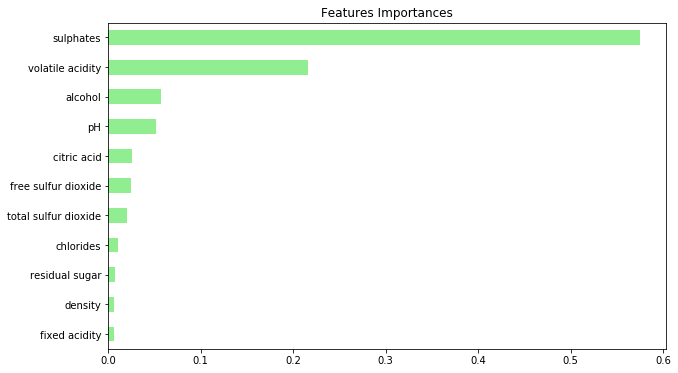

In [34]:
#creating pd series of feautres importances
df.drop(columns = "quality", axis= 1, inplace = True)
importances = pd.Series(data = regModel.feature_importances_, index = df.columns)
#sort importances
importances_sorted = importances.sort_values()
#drawing horizontal bar plot to check the importances sorted
plt.figure(6, figsize=(10, 6))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.savefig(folder+ "Feature importances")
plt.draw()

According to the plot above, sulphates, volatile acidity, alcohol and citric acid have high importance to the target variables.


Cross validation score is computed to check the model performance is all samples in the data. 

In [35]:
#computing cross validation score
cvScores= cross_val_score(regModel, X, y, cv = 5)
print('The Cross Validation scores for Random forest Regression model:', cvScores)
avgRegcvScore = cvScores.mean()
print("The Average cv Score of the model with 5k folds:", avgRegcvScore)


The Cross Validation scores for Random forest Regression model: [ 0.03283406 -0.03087763  0.00355262  0.05130826  0.04690917]
The Average cv Score of the model with 5k folds: 0.020745296323755567


## Conclusion



With Decision Tree classifier the accuracy obtained is 95.5% and confusion matrix is also computed which gives best results because GridSearchCV is used to find the best parameters. The best parameters in tuned Decision Tree are 'criterion': 'gini', 'max_depth': 5. 

Random forest regression is used as the regression model to calculate the regression performance in the dataset. The mean squared error and root mean square error is calculated. The model performed well, and error is less. Cross validation scores are also calculated, and the average score is calculated. The mean square error by regression model is 0.0355 and root mean squared error is 0.19. After cross validation, the average score with 5k folds is 0.020.

## References


1. UCI Machine Learning, "Kaggle," [Online]. Available: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009. [Accessed 4 January 2020]

2. A. Chakure, "Random Forest Regression," Towards Data science, [Online]. Available: https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f. [Accessed 04 January 2020]

3. Data camp, "Decision Tree Classification in Python," [Online]. Available: https://www.datacamp.com/community/tutorials/decision-tree-classification-python. [Accessed 04 January 2020].

4. P. Gupta, "Decision Trees in Machine Learning," Towards Data science, [Online]. Available: https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052. [Accessed 04 January 2020].
